In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random
import re

In [24]:
data = pd.read_csv("fake_or_real_news.csv")

In [25]:
data

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [26]:
data['fake'] = data['label'].apply(lambda x: 0 if x == "REAL" else 1)
data = data.drop("label", axis=1)

In [27]:
X, y = data["text"], data["fake"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

TF-IDF: Term Frequency - Inverse Document Frequency

A metric that indicates how important a word is to a document in a collection. It weighs the improtance of each word in a document based on how often it appears in that document and how often it appears accross all documents in the collection.

TF: Number of times a term t appears in a document
IDF: Logarithm of total number of documents divided by no. of docs that contain term
TF-IDF: TF * IDF

Basically allows us to find the most relevant and distinctive words per document.

In [28]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [29]:
clf = LinearSVC()  # Linear SVC is considered one of the best text classification algorithms
clf.fit(X_train_vectorized, y_train)

LinearSVC()

In [30]:
clf.score(X_test_vectorized, y_test)

0.9455406471981057

In [31]:
article_text = X_test.iloc[10]
vectorized_text = vectorizer.transform([article_text])

In [32]:
clf.predict(vectorized_text)

array([0], dtype=int64)

In [33]:
y_test.iloc[10]

0

In [34]:
# Generate a random index within the range of X_test
random_index = random.randint(0, len(X_test) - 1)

# Select a random article using the generated index
article_text = X_test.iloc[random_index]
vectorized_text = vectorizer.transform([article_text])

# Predict
predicted_value = clf.predict(vectorized_text)[0]

# Actual value
actual_value = y_test.iloc[random_index]

# Comparison and output
if predicted_value == actual_value:
    print("The answer is correct.")
else:
    print("The answer is incorrect.")



The answer is correct.


In [35]:
# Predict for the entire test set
predictions = clf.predict(X_test_vectorized)

# Convert predictions and actual labels to arrays for easier comparison
predictions_array = np.array(predictions)
actual_labels_array = y_test.to_numpy()

# Find indices where predictions and actual labels differ
mismatch_indices = np.where(predictions_array != actual_labels_array)[0]

## Print each mismatch with its index
# for index in mismatch_indices:
#     print(f"Index: {index}, Predicted: {predictions_array[index]}, Actual: {actual_labels_array[index]}")
#     print(f"Text: {X_test.iloc[index]}\n")


In [36]:
# Predict for the entire test set
predictions = clf.predict(X_test_vectorized)

# Convert predictions and actual labels to arrays for easier comparison
predictions_array = np.array(predictions)
actual_labels_array = y_test.to_numpy()

# Initialize lists for false negatives and false positives
false_negatives = []
false_positives = []

# Iterate over the predictions and actual labels
for i in range(len(predictions_array)):
    if predictions_array[i] == 0 and actual_labels_array[i] == 1:
        # False Negative
        false_negatives.append(i)
    elif predictions_array[i] == 1 and actual_labels_array[i] == 0:
        # False Positive
        false_positives.append(i)

In [37]:
# Print a False Negative
print("False Negatives: ACTUALLY FAKE")
index= false_negatives[8]
print(f"Index: {index}, Text: {X_test.iloc[index]}")
print()



False Negatives: ACTUALLY FAKE
Index: 433, Text: Originally appeared at Strategic Culture Foundation 
Both inside the US and around the world, political observers have been waiting a long time for an election that would promise relief from the most noxious features of the American system. Alas, while it is high time that the US lead the way in reversing these trends, the outcome of the 18 month struggle to elect a new administration looks likely to scuttle all hopes for serious leadership and reform. 
I'm looking forward to a market crash to awaken the electorate out of our rut, honestly. Because if a Loony Tunes candidate {meaning Donald Trump – DK} doesn't give Democrats the courage to put up a push-left candidate {Bernie Sanders, or some facsimile – DK}, then catastrophe is the only correction we have left. – commenter «Snapshotist» 
Both inside the US and around the world, political observers have been waiting a long time for an election that would promise relief from the most noxi

In [38]:
# Print a False Positive
print("\nFalse Positives: ACTUALLY REAL")
index= false_positives[8]
print(f"Index: {index}, Text: {X_test.iloc[index]}")
print()


False Positives: ACTUALLY REAL
Index: 155, Text: After the bombshell announcement Friday that the FBI is reopening the Clinton email investigation, Hillary Clinton looked awkward on the campaign trail as she tried to take suspicion off herself and put it on FBI Director James Comey.

"Some of you may have heard about a letter," Clinton said to a chorus of boos from her supporters. "It's pretty strange to put something like that out with such little information right before an election. In fact, it's not just strange, it's unprecedented and it is deeply troubling."

The Wall Street Journal reported that Comey's letter sent to lawmakers Friday said that 650,000 emails were discovered on the laptop of disgraced former Congressman Anthony Wiener, the estranged husband of Clinton's top aide, Huma Abedin. Weiner is under criminal investigation for allegedly sexting a teen.

Metadata on the emails suggests thousands of those messages could have been sent to or from then-Secretary of State Cl

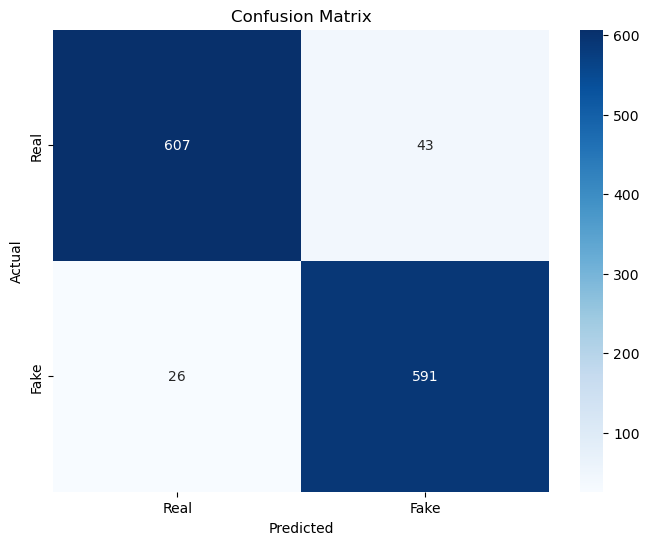

In [39]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
